# Cardiovascular disease Prediction

Cardiovascular diseases are the No.1 reason for all deaths in the world [[WHO](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))].

There are many subgroups of different kind of diseases centred around the heart and the blood vessels:

- coronary heart disease – disease of the blood vessels supplying the heart muscle
- cerebrovascular disease – disease of the blood vessels supplying the brain
- peripheral arterial disease – disease of blood vessels supplying the arms and legs
- rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria
- congenital heart disease – malformations of heart structure existing at birth
- deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs.

The typical risk factors of Cardiovascular diseases are:

- Behavioral:
    - diet,
    - physical inactivity,
    - tobacco use and
    - harmful use of alcohol.

- Medical Values:
    - raised blood pressure,
    - raised blood glucose,
    - raised blood lipids and
    - overweight & obesity


The risk factors mentioned above are quite numerous, and a doctor is only so good at asking questions and data control.
Our motivation for this project is to help doctors and patients by providing a tool that is able to make a prediction of how likely it is that
one will be subjected to a cardiovascular disease.

The objective is to use data recordings of 70 000 patients, including 11 different Features to predict a Cardiovascular Disease. This disease is a leading cause of death and many are preventable. The Machine Learning model might therefore be a useful tool to bring attention to early stages and to minimize examination mistakes by providing a second opinion.


## Dataset

To make this prediction possible we found a dataset containing said risk factors as features, and the label based on the Cardiovascular disease status.
This dataset is taken from Kaggle.com and can be found [here](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset).

The dataset has 70 000 rows and 13 columns. There are 3 types of input features:

* Objective: factual information
* Examination: results of medical examination
* Subjective: information given by the patient

| [0] id| [1] age| [2] gender| [3] height| [4] weight|
| ---| ---| ---| ---| ---|
| int| int| 1 or 2 | int| float|
| -| days| categorical code (2=men)| cm| kg |
| -| Objective| Objective| Objective| Objective |

| [5] ap_hi| [6] ap_lo| [7] cholesterol| [8] gluc|
| ---| ---| ---| ---|
| int| int| 1, 2, 3 | 1, 2, 3 |
| -| -| normal, above normal, well above normal| normal, above normal, well above normal|
| Examination| Examination| Examination| Examination|

>Note: ap_hi = Systolic blood pressure, ap_lo = Diastolic blood pressure, gluc = Glucose

| [9] smoke| [10] alco| [11] active| [12] cardio|
| ---| ---| ---| ---|
| binary| binary| binary| binary |
| -| -| -| categorical code|
| Subjective| Subjective| Subjective| Target|

>Note: alco = Alcohol intake



## EDA - Data Correlation

A good start for choosing the correct prediction algorithm is an exploratory data analysis (EDA).
This analysis looks at the data and shows potential correlations or problems.

More information and details can be found in this [report](../docs/CardioVascular-Diseas-Prediction.html).

 - Our results show that some data is corrupt a needs to be fixed (mostly blood pressure and outliers).
 - The data is not linear separable, so we definitely need a good feature function or kernel.
 - The result of the prediction should be a label and not a value, so we want a classifier.


Based on the these results a good choice for a prediction algorithm in our project is the Kernel Logistic Regression.


When we compare our data with the WHO's [cardiovascular risk charts](https://www.who.int/news/item/02-09-2019-who-updates-cardiovascular-risk-charts)
we should see a trend that show's that either being a man, a smoker, a person with diabetes, a person with higher cholesterol levels,
or an older person the more at risk one is of having a cardiovascular disease.

When we look at our data we clearly see this trend:
To get a better understanding of our data set and the relation between the variables, we compute the correlation matrix.


Text(0.5, 1.0, 'Correlation Matrix')

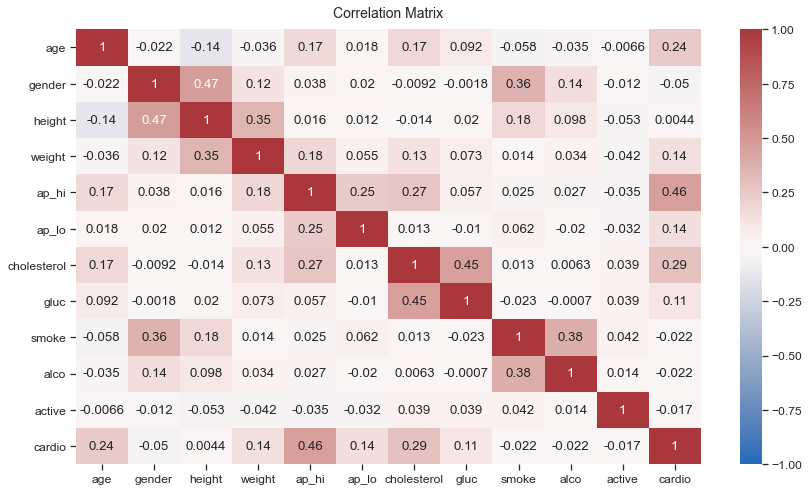

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
plot_df = pd.read_csv('../resources/cardio_train.csv', sep=';', index_col='id')[:1000]

plt.figure(figsize=(14, 8))
sns.heatmap(plot_df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
plt.title('Correlation Matrix', fontdict={'fontsize':14}, pad=12)

By looking into the last column, we can see the variables which correlates most to a cardiovascular disease.
In this case the biggest influence have the Features age, weight, the upper value of diastolic blood pressure and the cholesterol value.
Surprisingly, against any expectations smoking and alcohol does not have any negative impact.

- age, weight, cholesterol, glucose levels and being physical active supporting the theory
- gender showing no clear trend
- being a smoker and drinking alcohol showing an opposite trend

We plot the Features 'age' and 'weight' to see whether we there is a trend in the data.

<AxesSubplot:xlabel='age', ylabel='weight'>

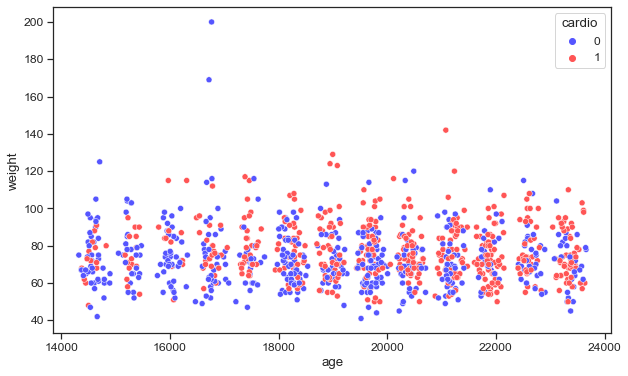

In [2]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='weight', data= plot_df, hue='cardio',palette = "seismic")


## Kernel Logistic Regression

### Imports

In [3]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

### Kernel / Feature function

For the best result we want to include all of our risk factors. In other words, we want a Feature Function with all our features.
Based on our EDA we can say that our data is not linear separable. There might a case our where data is linear separable,
but instead of finding the best feature function or introducing an extra dimension to make the data linear separable,
we kernelize our feature function.

$h(x) = w^T * \Phi(x_i)= w^T*K(x,z) = w^T * (x^T*z+1)^d $

$ min J(w) = \frac{1}{m} \sum_{i=1}^{m} l(h(x_i), y_i) + \Omega(w)$

### Load Data

In [4]:
print('-'*30); print("IMPORTING DATA");print('-'*30)
# limit dataset to 5000 instances for testing purposes (memory issues)
df = pd.read_csv('../resources/cardio_train.csv', sep=';', index_col='id')[:1000]
# df = pd.read_csv('../resources/cardio_train.csv', sep=';', index_col='id')

------------------------------
IMPORTING DATA
------------------------------


### Feature Scaling

Our dataset includes corrupt values and has outliers that need to be expelled before we can make a solid prediction.
The information provided by the dataset depends on the category. While some are binary values are
numerical on a scale like weight and height.
To reduce noise between the features we need to normalize these data points to a similar scale, this process is called feature scaling.

 TODO @Jan: wollen wir noch mehr beschreiben, z.B. siehe unten?

from wiki:
```
For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.[1]

It's also important to apply feature scaling if regularization is used as part of the loss function (so that coefficients are penalized appropriately).
```
Since some features have very high values e.g. 'age' which is given in days, we standardized our data such that all features has a mean of zero and a standard deviation of 1. Therfore, we use the standardization formular:

$\tilde{x_i} = \frac{x_i - \mu}{\sigma}$

In [5]:
import statistics
# TODO LEO: outlier out , define valid range, delete faulty rows

# data will be saved in extra file so we dont need to run this every time
feature_scale_flag = True

if feature_scale_flag:
    # Min/Max Scaling on I=[0,1]: x_scaled = (x - min(x)) / (max(x) - min(x))
    # df['age_scaled'] = ((df['age'])-min(df['age']))/(max(df['age'])-min(df['age']))
    # df['height_scaled'] = ((df['height'])-min(df['height']))/(max(df['height'])-min(df['height']))
    # df['weight_scaled'] = ((df['weight'])-min(df['weight']))/(max(df['weight'])-min(df['weight']))
    # Standardization: x_standardized = (x - µ) / sigma
    df['age_standardized'] = (df['age']-statistics.mean(df['age'])) / statistics.stdev(df['age'])
    df['height_standardized'] = (df['height']-statistics.mean(df['height'])) / statistics.stdev(df['height'])
    df['weight_standardized'] = (df['weight']-statistics.mean(df['weight'])) / statistics.stdev(df['weight'])

    # df['bmi'] = (df['weight'] / ((df['height'] / 100) ** 2)).round(decimals=2)
    # df['bmi_high'] = (df['bmi'] >= 30).astype(int)

    df['cardio'] = df['cardio'].apply(lambda t: 1 if t==1 else -1).values

    # eliminate corrupted Data
    df['ap_lo_fixed'] = [x if 50 < x < 150 else -1 for x in df['ap_lo']]
    df['ap_hi_fixed'] = [x if 100 < x < 190 else -1 for x in df['ap_hi']]

## Implement functions

### squared exponential kernel $k(x,z)$
$k(x,z) = exp(− x^Tx−2x^Tz+z^Tz/ 2σ^2) = exp(sqdist(x,z)/2σ^2)$

### hypothesis function $h(x)$
$h_\alpha(x) = \alpha K = \sum_{j=1}^{m} \alpha_j k(x_j,x)$

### loss function $l(h(x),y)$

logistic loss:
$l_{logistic}(h_\alpha(x), y) = log(1 + e^{−y·h(x)})= log(1 + exp(−y · h_\alpha(x)))$

### $l_2$ regularizer

$r = \lambda l_2 = \lambda\alpha^{\intercal}K\alpha$


### objective function J

  kernlized logistic regression

reuslting in a regularized kernlized logistic:
$
J(\alpha) = \frac{1}{m}\sum_{i=1}^m  \log \big(1 + \exp\big(-y_i \cdot \sum_{j=1}^{m} \alpha_j k(x_j,x_i)\big) \big) + \lambda \alpha^{\intercal}K\alpha
$

In [6]:
def sqdist(X, Z):
    p1 = np.sum(X**2, axis=1)[:, np.newaxis]
    p2 = np.sum(Z**2, axis=1)
    p3 = -2 * np.dot(X, Z.T)
    return p1+p2+p3

def sq_exp(X, Z, sigma):
    return np.exp(-sqdist(X, Z)/(2*sigma**2) )


def J(α, X, y, sigma, lam):
    K = sq_exp(X, X, sigma)
    m = X.shape[0]
    total_loss = 0
    regularization = lam * np.dot(np.dot(np.transpose(α), K), α)

    for i in range(m):
        prediction = 0
        for j in range(m):
            prediction += α[j]*K[i][j]
        logistic_loss = np.log(1 + np.exp(-y[i] * prediction))
        total_loss += logistic_loss

    mean_loss = total_loss / m  + regularization
    return mean_loss

Implement the gradient of the regularized kernlized logistic regression objective.

In [7]:
def dJ(α, X, y, sigma, lam):
    K = sq_exp(X, X, sigma)
    m = X.shape[0]
    gradient = 0
    regularization = 2*lam * np.dot( K, α)

    for i in range(m):
        prediction = 0
        for j in range(m):
            prediction += α[j]*K[i][j]

        numerator = -y[i] * K[i]
        denominator = 1 + np.exp(y[i] * prediction)
        gradient += numerator / denominator

    mean_gradient = gradient / m + regularization
    return mean_gradient


## Train model

In [8]:
from scipy.optimize import minimize

def kernel_lr(X, y, sigma, lam):
    # implementation of kernel ridge regression using the scipy optimizer gradient descent
    α = np.zeros(X.shape[0],)
    α = minimize(J, α, args=(X, y, sigma, lam), jac=dJ, method='CG').x
    h = lambda Z: np.dot(α, sq_exp(X, Z, sigma))
    return h

## Split data in Train / Validation / Test

We'll first split our data into a Train set (70%) and Test set (30%).  
The training set will be further processed using 10-fold-cross-validation.

In [9]:
def train_test_split(data, train_proportion=0.7, shuffle=False):
    if shuffle:
        indices = np.random.permutation(data.shape[0])
    else:
        indices = np.arange(data.shape[0])

    split_index = int(train_proportion * data.shape[0])
    training_idx = indices[:split_index]
    test_idx = indices[split_index:]

    return data[training_idx, :], data[test_idx, :]


def cross_val(data, k=10):
    assert k >= 2
    datasets = []

    if data.shape[0] % k != 0:
        print("warning: this dataset contains {} entries and cannot be equally divided into {} chunks for cross-validation.".format(data.shape[0], k))
        print("Prutruding rows will be dropped.")
        data = data[ : (data.shape[0] // k) * k]

    for i in range(k):
        data_chunks = np.split(data, k)

        val_data = data_chunks.pop(i)
        train_data = np.concatenate(data_chunks)
        datasets.append((train_data, val_data))

    return datasets

def get_labels_and_features(dataset:np.ndarray)->Tuple[np.ndarray, np.ndarray]:
    """Return labels and features from a given dataset.
    :return: labels, features
    """
    # [0] age - [10] active
    # [11] cardio
    # [12] scaled age - [22]...
    col = {
        'age':0, 'gender': 1, 'height':2 , 'weight': 3, 'ap_hi': 4, 'ap_lo': 5, 'cholesterol': 6,
        'gluc': 7, 'smoke': 8, 'alco': 9, 'active': 10, 'cardio': 11, 'age_standardized': 12,
        'height_standardized': 13, 'weight_standardized': 14, 'ap_hi_fixed':15, 'ap_lo_fixed': 16
           }
    feature_list = [
        col['age_standardized'], col['gender'], col['height_standardized'], col['weight_standardized'],
        col['cholesterol'], col['gluc'], col['active'], col['ap_lo_fixed'],col['ap_hi_fixed']
        ]
    labels = dataset[:, col['cardio']]
    features = dataset[:, feature_list]
    return labels, features


In [10]:
cardio_data = df.to_numpy()
train_data, test_data = train_test_split(cardio_data, shuffle=False)
datasets = cross_val(train_data, k=2)

# only use a single dataset for now
#train_set, val_set = datasets[0]
#y, X = get_labels_and_features(train_set)

## Evaluate minimized hypothesis function $h$

In [11]:
def score(h, X, y):
    predictions = h(X)
    #print(predictions)

    score = (predictions*y >= 0).astype(int)
    return score.sum()/score.shape[0]

def train_n_score(datasets, sigma, lam):
    train_accuracy = []
    val_accuracy = []
    for train_set, val_set in datasets:
        y_train, X_train = get_labels_and_features(train_set)
        y_val, X_val = get_labels_and_features(val_set)

        h = kernel_lr(X_train, y_train, sigma=sigma, lam=lam)

        train_accuracy.append(score(h, X_train, y_train))
        val_accuracy.append(score(h, X_val, y_val))

    print(f'Average model accuracy for sigma={sigma}, lambda={lam}')
    print(f'train: {sum(train_accuracy)/len(train_accuracy)}')
    print(f'val: {sum(val_accuracy)/len(val_accuracy)}\n')


sigmas=[0.5, 1.]
lambdas=[0.1, 1.]

for sigma in sigmas:
    for lam in lambdas:
        train_n_score(datasets, sigma, lam)


Average model accuracy for sigma=0.5, lambda=0.1
train: 0.97
val: 0.6699999999999999

Average model accuracy for sigma=0.5, lambda=1.0
train: 0.97
val: 0.6699999999999999

Average model accuracy for sigma=1.0, lambda=0.1
train: 0.8857142857142857
val: 0.7157142857142857

Average model accuracy for sigma=1.0, lambda=1.0
train: 0.8857142857142857
val: 0.7142857142857143



TODO Leo: show generalization error in plot

TODO: measures against over and underfitting

TODO Jan: interpretation of result -> plot von Jan, bzw. für relevante Variablen

## Jan Plots

In [12]:
def plot_fit(h=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    s1 = ax.scatter(X[y>=0,0], X[y>=0,1], marker='.', color='gray')
    s2 = ax.scatter(X[y<=0,0], X[y<=0,1], marker='.', color='orange')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.xlabel("Ip")
    plt.ylabel("Vp/Vs")
    plt.legend([s1,s2], ['sand', 'shale'])
    if h:
        grid =150
        xx,yy = np.meshgrid(np.linspace(xlim[0], xlim[1], grid), np.linspace(ylim[0], ylim[1], grid))
        XY = np.array([np.ravel(xx), np.ravel(yy)]).T
        P = h(XY).reshape(grid, grid)
        cn = ax.contour(xx, yy, P, colors='k',levels=10)
        ax.clabel(cn, inline=1, fontsize=10)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
X = df[['age_standardized','weight_standardized']].values
y = df['cardio'].apply(lambda t: 1 if t==1 else -1).values
plot_fit(kernel_lr(X, y, sigma=1, lam=1))

TODO: Ausblick -> z.B. andere Lern algorithm, ensemble Methoden wie adaboost, ...
Ausblick wenn mehr Zeit - do we want to show any differences compared to decision trees , SVM's, etc...

TODO Vincent: Metrics -> Accuracy, F1 score



## Further Cases

Cardiovascular disease Prediction
